In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the data.

# data = pd.read_csv('train.tsv', sep='\t')

data = pd.read_csv('lululemon athletica sales.csv')

In [4]:
# Take a look at the data.

print(data.shape)
data.head()

(198, 8)


,Sale Date,Size,Price,Listing Format,Item Condition,Style,Item Specifics,Item Type
0,6/24/2017,XXL,30.70,Fixed,Pre-Owned,Metal Vent Tech Shirt,Long Sleeve,Top
1,7/5/2017,XL,42.00,Auction,Pre-Owned,Unknown,Short Sleeve,Top
2,7/17/2017,XXL,20.50,Auction,Pre-Owned,Commission Short,NaN,Bottom
3,7/21/2017,XL,35.70,Fixed,Pre-Owned,Unknown,Long Sleeve,Top
4,7/25/2017,L,54.99,Fixed,Pre-Owned,T.H.E. Short,Linerless,Bottom


### Data Cleaning
#### - These are men's items only.
#### - We know the style of each item and each item sale was a fixed price listing.

In [5]:
data = data[data['Style'] != 'Unknown']

In [6]:
data = data[data['Listing Format'] != 'Auction']

In [7]:
data = data[~data['Style'].str.contains('Pant')]

In [8]:
data = data[~data['Style'].str.contains('Jogger')]

In [10]:
print(data.shape)
data.head()

(110, 8)


,Sale Date,Size,Price,Listing Format,Item Condition,Style,Item Specifics,Item Type
0,6/24/2017,XXL,30.70,Fixed,Pre-Owned,Metal Vent Tech Shirt,Long Sleeve,Top
4,7/25/2017,L,54.99,Fixed,Pre-Owned,T.H.E. Short,Linerless,Bottom
10,8/12/2017,XXL,40.70,Fixed,Pre-Owned,Pace Breaker Short,Lined,Bottom
13,8/14/2017,L,47.70,Fixed,Pre-Owned,Surge Short,Lined,Bottom
18,8/21/2017,M,32.00,Fixed,Pre-Owned,Metal Vent Tech Shirt,Short Sleeve,Top


In [12]:
# Drop columns that won't be used for feature engineering.

data = data.drop(columns=['Listing Format', 'Item Type'])

### Feature engineering
#### - Create a season feature out of pre-existing sale date feature.

In [13]:
#Summer 2017: 6/20 - 9/22

#Fall 2017: 9/22 - 12/21

#Winter 2017/2018: 12/21 - 3/20

#Spring 2018: 3/20 - 6/21

In [14]:
data['Sale Date'] = pd.to_datetime(data['Sale Date'])

In [15]:
data = data.set_index('Sale Date')

In [16]:
data.head()

,Size,Price,Item Condition,Style,Item Specifics
Sale Date,,,,,
2017-06-24,XXL,30.70,Pre-Owned,Metal Vent Tech Shirt,Long Sleeve
2017-07-25,L,54.99,Pre-Owned,T.H.E. Short,Linerless
2017-08-12,XXL,40.70,Pre-Owned,Pace Breaker Short,Lined
2017-08-14,L,47.70,Pre-Owned,Surge Short,Lined
2017-08-21,M,32.00,Pre-Owned,Metal Vent Tech Shirt,Short Sleeve


#### Summer

In [17]:
summer = data['2017-06-20':'2017-09-21']

In [18]:
summer = summer.reset_index()

In [19]:
# Add season feature.

summer['Season'] = 'Summer'

In [20]:
summer.head()

,Sale Date,Size,Price,Item Condition,Style,Item Specifics,Season
0,2017-06-24,XXL,30.70,Pre-Owned,Metal Vent Tech Shirt,Long Sleeve,Summer
1,2017-07-25,L,54.99,Pre-Owned,T.H.E. Short,Linerless,Summer
2,2017-08-12,XXL,40.70,Pre-Owned,Pace Breaker Short,Lined,Summer
3,2017-08-14,L,47.70,Pre-Owned,Surge Short,Lined,Summer
4,2017-08-21,M,32.00,Pre-Owned,Metal Vent Tech Shirt,Short Sleeve,Summer


#### Fall

In [21]:
fall = data['2017-09-22':'2017-12-20']

In [22]:
fall = fall.reset_index()

In [23]:
# Add season feature.

fall['Season'] = 'Fall'

In [24]:
fall.head()

,Sale Date,Size,Price,Item Condition,Style,Item Specifics,Season
0,2017-10-02,L,34.00,Pre-Owned,Evolution Polo,Short Sleeve,Fall
1,2017-10-08,L,43.70,Pre-Owned,Pace Breaker Short,Lined,Fall
2,2017-10-13,L,49.99,Pre-Owned,Metal Vent Tech Shirt,Long Sleeve,Fall
3,2017-10-22,L,49.99,Pre-Owned,Metal Vent Tech Shirt,Short Sleeve,Fall
4,2017-10-23,L,46.99,Pre-Owned,Metal Vent Tech Shirt,Short Sleeve,Fall


#### Winter

In [25]:
winter = data['2017-12-21':'2018-03-19']

In [26]:
winter = winter.reset_index()

In [27]:
# Add season feature.

winter['Season'] = 'Winter'

In [28]:
winter.head()

,Sale Date,Size,Price,Item Condition,Style,Item Specifics,Season
0,2017-12-25,L,46.99,Pre-Owned,Metal Vent Tech Shirt,Long Sleeve,Winter
1,2018-01-03,M,47.99,Pre-Owned,T.H.E. Short,Lined,Winter
2,2018-01-18,L,46.99,Pre-Owned,Surge Short,Linerless,Winter
3,2018-01-19,L,35.00,Pre-Owned,Metal Vent Tech Shirt,Short Sleeve,Winter
4,2018-01-21,L,35.00,Pre-Owned,Surge Short,Linerless,Winter


#### Spring

In [29]:
spring = data['2018-03-20':'2018-06-20']

In [30]:
spring = spring.reset_index()

In [31]:
# Add season feature.

spring['Season'] = 'Spring'

In [32]:
# Concatenate the season dataframes.

data = pd.concat([summer, fall, winter, spring])

In [33]:
# Drop the sale date feature.

data = data.drop(columns='Sale Date')

In [34]:
data.head()

,Size,Price,Item Condition,Style,Item Specifics,Season
0,XXL,30.70,Pre-Owned,Metal Vent Tech Shirt,Long Sleeve,Summer
1,L,54.99,Pre-Owned,T.H.E. Short,Linerless,Summer
2,XXL,40.70,Pre-Owned,Pace Breaker Short,Lined,Summer
3,L,47.70,Pre-Owned,Surge Short,Lined,Summer
4,M,32.00,Pre-Owned,Metal Vent Tech Shirt,Short Sleeve,Summer


#### How is price distributed across style?

In [35]:
import seaborn as sns

In [36]:
data['Style'].value_counts()

Metal Vent Tech Shirt        35
T.H.E. Short                 20
Surge Short                  18
Pace Breaker Short           12
Metal Vent Tech Polo          5
Metal Vent Tech Tank Top      5
Metal Vent Tech 1/2 Zip       4
Evolution Polo                3
Surge Warm                    2
Metal Vent Tech Henley        2
Current State Board Short     1
Commission Shirt              1
5 Year Basic Tee              1
Commission Short              1
Name: Style, dtype: int64

##### Metal Vent Tech Shirt

In [37]:
metal = data[data['Style'] == 'Metal Vent Tech Shirt']

metal['Price'].describe()

count    35.000000
mean     42.318571
std       5.118049
min      30.700000
25%      40.000000
50%      41.990000
75%      44.990000
max      49.990000
Name: Price, dtype: float64

Average price of Metal Vent Tech Shirts: $ 42.31857142857143


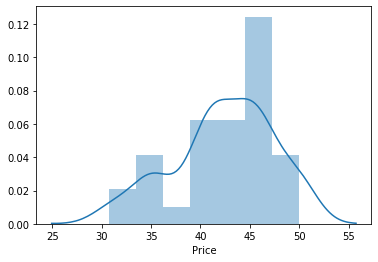

In [38]:
sns.distplot(metal['Price']);
mean = metal['Price'].mean()
print('Average price of Metal Vent Tech Shirts:', '$', mean )

##### T.H.E. Short

In [39]:
the_short = data[data['Style'] == 'T.H.E. Short']

the_short['Price'].describe()

count    20.000000
mean     45.395000
std       5.131743
min      35.000000
25%      41.990000
50%      45.005000
75%      48.490000
max      54.990000
Name: Price, dtype: float64

Average price of T.H.E. Short: $ 45.395


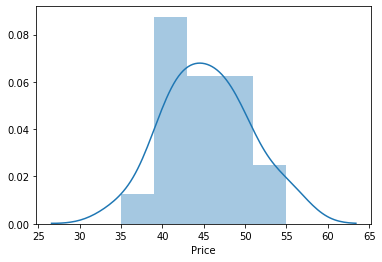

In [40]:
sns.distplot(the_short['Price']);
mean = the_short['Price'].mean()
print('Average price of T.H.E. Short:', '$', mean )

#### Surge Short

In [41]:
surge_short = data[data['Style'] == 'Surge Short']

surge_short['Price'].describe()

count    18.000000
mean     41.867222
std       4.664847
min      30.000000
25%      40.000000
50%      41.990000
75%      44.997500
max      47.990000
Name: Price, dtype: float64

Average price of Surge Short: $ 41.867222222222225


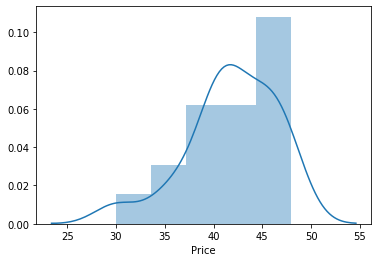

In [42]:
sns.distplot(surge_short['Price']);
mean = surge_short['Price'].mean()
print('Average price of Surge Short:', '$', mean )

### Look at how the target is distributed.

In [43]:
# Look at the descriptive statisitcs of the target.

pd.options.display.float_format = '{:,.0f}'.format
data['Price'].describe()

count   110
mean     43
std       6
min      20
25%      40
50%      43
75%      47
max      58
Name: Price, dtype: float64

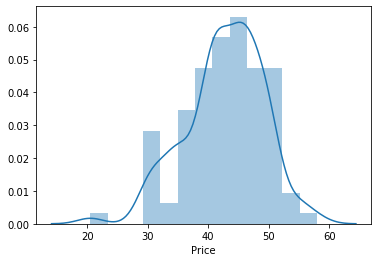

In [44]:
# Visualize the distribution of the target.

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data['Price']);

In [45]:
data.head()

,Size,Price,Item Condition,Style,Item Specifics,Season
0,XXL,31,Pre-Owned,Metal Vent Tech Shirt,Long Sleeve,Summer
1,L,55,Pre-Owned,T.H.E. Short,Linerless,Summer
2,XXL,41,Pre-Owned,Pace Breaker Short,Lined,Summer
3,L,48,Pre-Owned,Surge Short,Lined,Summer
4,M,32,Pre-Owned,Metal Vent Tech Shirt,Short Sleeve,Summer


### Create a new csv with the clean data.

In [46]:
data.to_csv('clean_lulu.csv', index=False)

In [47]:
# Load the new data.

df = pd.read_csv('clean_lulu.csv')

In [48]:
print(df.shape)
df.head()

(110, 6)


,Size,Price,Item Condition,Style,Item Specifics,Season
0,XXL,31,Pre-Owned,Metal Vent Tech Shirt,Long Sleeve,Summer
1,L,55,Pre-Owned,T.H.E. Short,Linerless,Summer
2,XXL,41,Pre-Owned,Pace Breaker Short,Lined,Summer
3,L,48,Pre-Owned,Surge Short,Lined,Summer
4,M,32,Pre-Owned,Metal Vent Tech Shirt,Short Sleeve,Summer
